# DEMO - Shape library

26 October 2016

Scott Cole

This notebook demonstrates the usage of the local library shape.py within the misshapen repo.

We start by importing some example neural data (section 0A), and simulating some oscillations with different waveform shapes (section 0B). We then analyze the waveforms of these data by using functions defined in shape.py. First, we locate all the peaks and troughs of the oscillation (section 1), and then we characterize the shape of the waveform shape using the following measures:

    a. Rise and decay times (and ratio)
    b. Peak and trough durations (and ratio)
    c. Symmetry between peaks and troughs (or rise and decay)
    d. Sharpness of peaks and troughs
    e. Steepness of rises and decays

**Default Imports**

In [1]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import seaborn as sns
sns.set_style('white')

In [2]:
from misshapen import shape, nonshape

# 0. Example data

Import and generate data that will be analyzed in later sections

## 0A. Real data

Import an example voltage time series

In [3]:
# Import the data
x = np.load('./exampledata.npy') # voltage series
Fs = 1000. # sampling rate
t = np.arange(0,len(x)/Fs,1/Fs) # time array

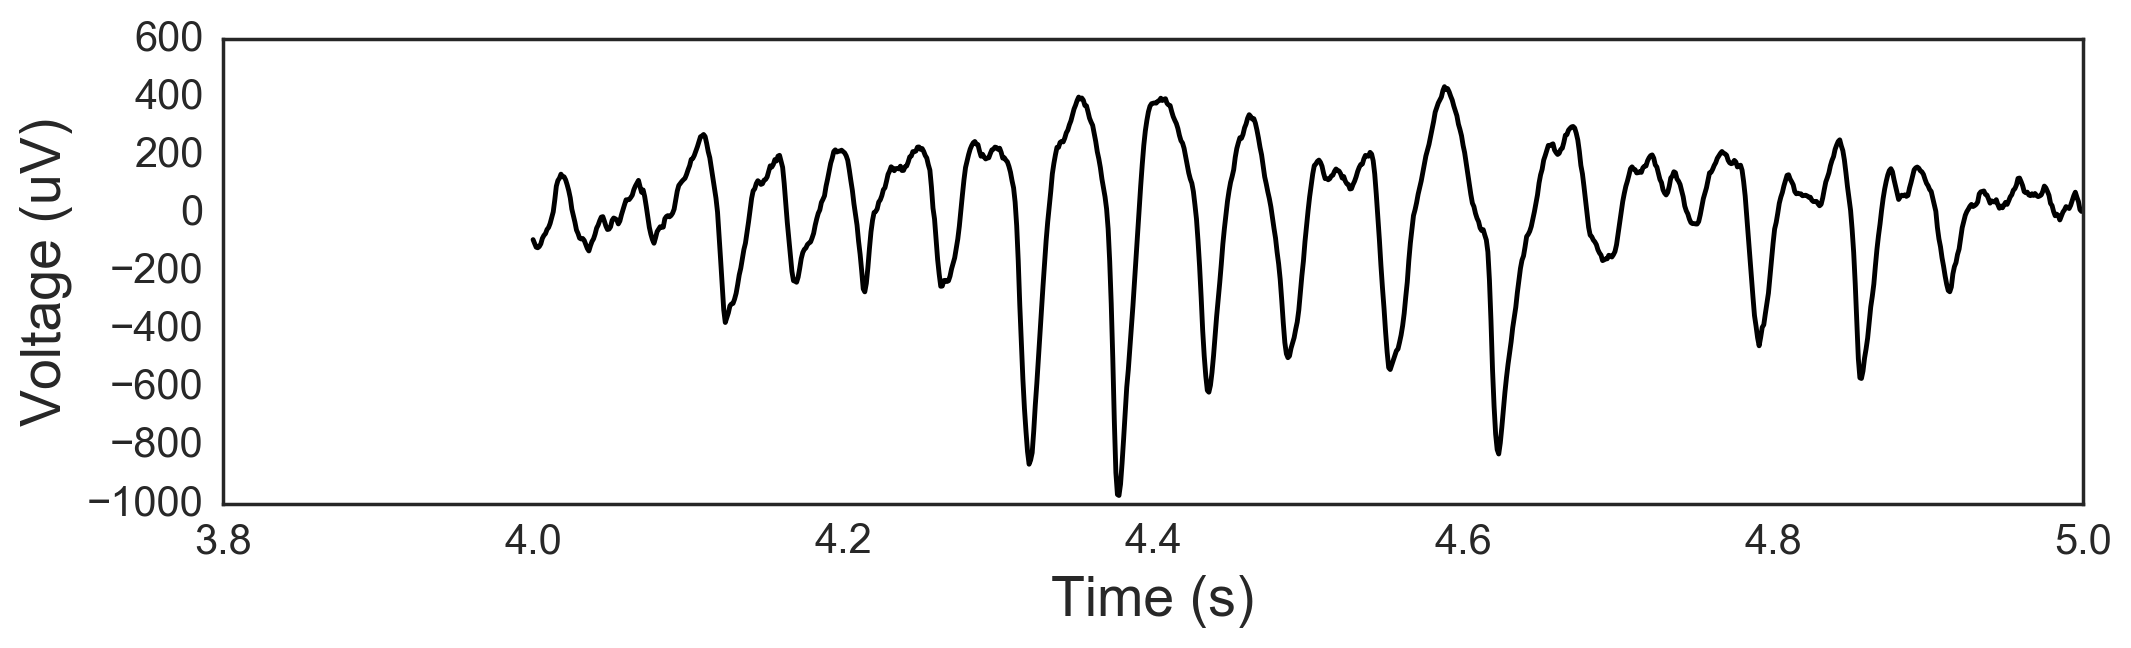

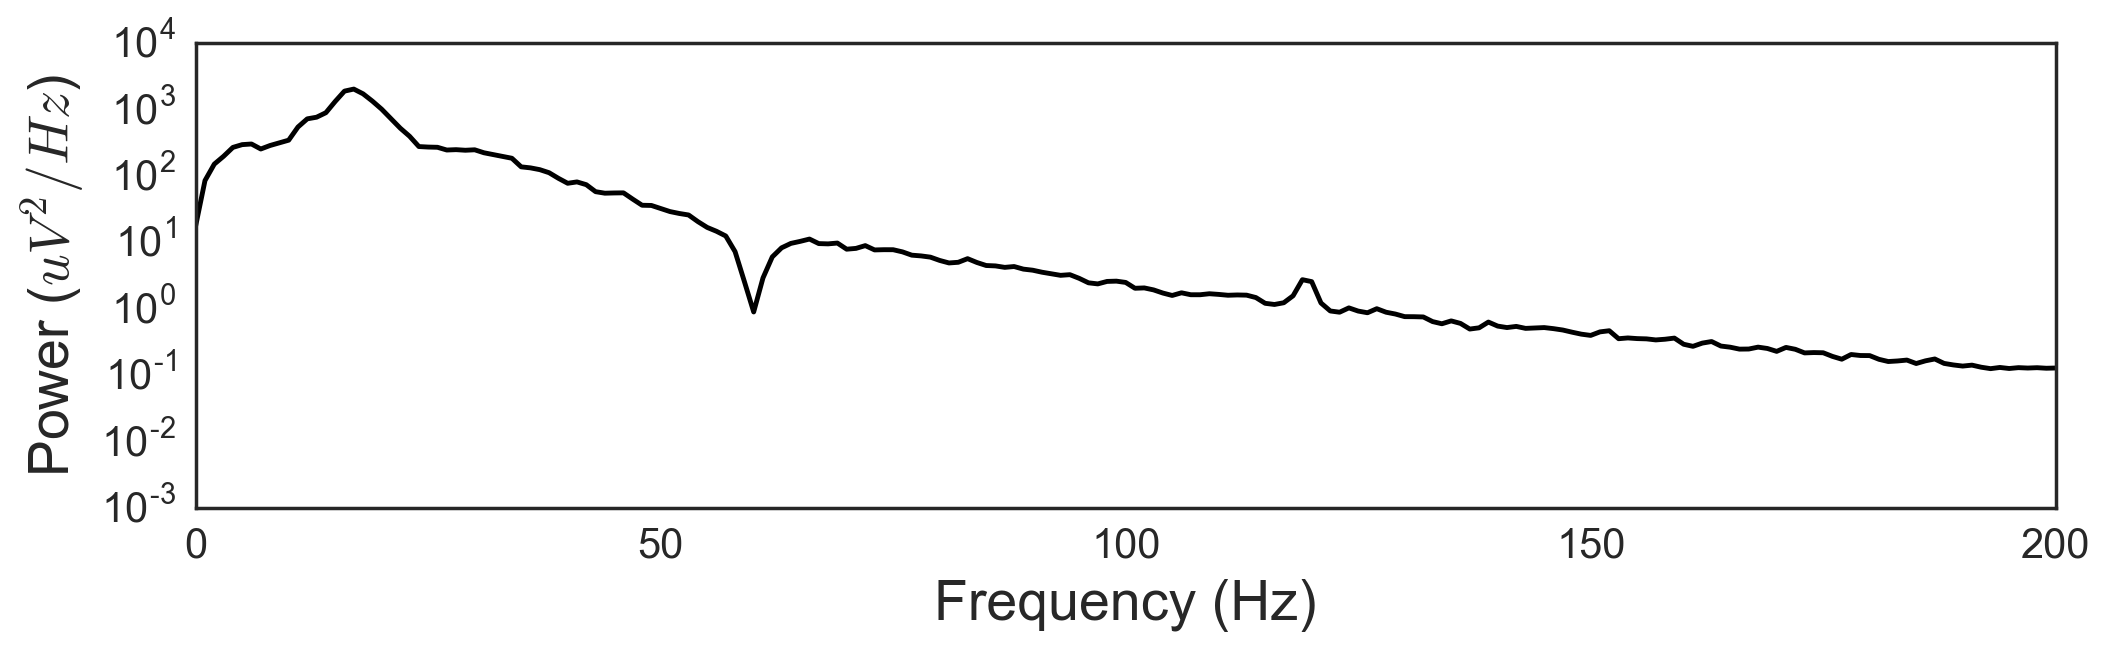

In [4]:
# Plot time series
t_plot = [4,5]
t_plot_idx = np.where(np.logical_and(t>=t_plot[0],t<t_plot[1]))[0]
plt.figure(figsize=(12,3))
plt.plot(t[t_plot_idx], x[t_plot_idx],'k')
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('Time (s)',size=20)
plt.ylabel('Voltage (uV)',size=20)

# Calculate the power spectrum
from scipy import signal
f, psd = sp.signal.welch(x, Fs, nperseg=1000)

# Plot the power spectrum
plt.figure(figsize=(12,3))
plt.semilogy(f,psd,'k')
plt.xlim((0,200))
plt.yticks(size=15)
plt.xticks(size=15)
plt.ylabel('Power ($uV^{2}/Hz$)',size=20)
plt.xlabel('Frequency (Hz)',size=20)

## 0B. Simulated peak-trough asymmetric 6Hz oscillation

Generate example oscillatory signals with various shapes

In [5]:
# Define parameters of the signals
np.random.seed(0)
flo = (5.5, 6.5) # Frequency range of oscillation
sfc_fr = 1 # not important
fr = 10 # not important
T = 10 # length of time (in seconds)
dt = .001 # time step (in seconds)
Fs = 1/dt # sampling rate
lfps_t = np.arange(0,T,dt) # time array

# Simulate oscillatory signals with different shapes
N_shapes = 10 # Number of signals to simulate
std_sharp = np.linspace(.8,1.2,N_shapes) # Parameter governing the shape of the oscillation (specifically, the standard deviation of the Gaussian event that occurs in each cycle)
S = int(T*Fs) # Total number of samples

# Generate the signals using tools imported from the 'sim' library (see https://github.com/srcole/tools)
from tools.sim import pha2r, simphase
simphaseBeta, _ = simphase(T, flo, dt=dt, returnwave=True)
lfps = np.zeros((N_shapes,S))
for n in range(N_shapes):
    lfps[n] = pha2r(simphaseBeta, 'gauss', sfc_fr, fr, normstd = std_sharp[n])
    lfps[n] = lfps[n] - np.mean(lfps[n])

[ 0.05259438  0.04823261  0.04367153 ..., -0.02346197 -0.02108351
 -0.01875525]


(array([-10.,  -5.,   0.,   5.,  10.,  15.,  20.,  25.]),
 <a list of 8 Text yticklabel objects>)

(array([-10.,  -5.,   0.,   5.,  10.,  15.,  20.]),
 <a list of 7 Text yticklabel objects>)

(array([-10.,  -5.,   0.,   5.,  10.,  15.,  20.]),
 <a list of 7 Text yticklabel objects>)

(array([-10.,  -5.,   0.,   5.,  10.,  15.,  20.]),
 <a list of 7 Text yticklabel objects>)

(array([-10.,  -5.,   0.,   5.,  10.,  15.,  20.]),
 <a list of 7 Text yticklabel objects>)

(array([-10.,  -5.,   0.,   5.,  10.,  15.]),
 <a list of 6 Text yticklabel objects>)

(array([-10.,  -5.,   0.,   5.,  10.,  15.]),
 <a list of 6 Text yticklabel objects>)

(array([-10.,  -5.,   0.,   5.,  10.,  15.]),
 <a list of 6 Text yticklabel objects>)

(array([-10.,  -5.,   0.,   5.,  10.,  15.]),
 <a list of 6 Text yticklabel objects>)

(array([-10.,  -5.,   0.,   5.,  10.,  15.]),
 <a list of 6 Text yticklabel objects>)

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 6 Text xticklabel objects>)

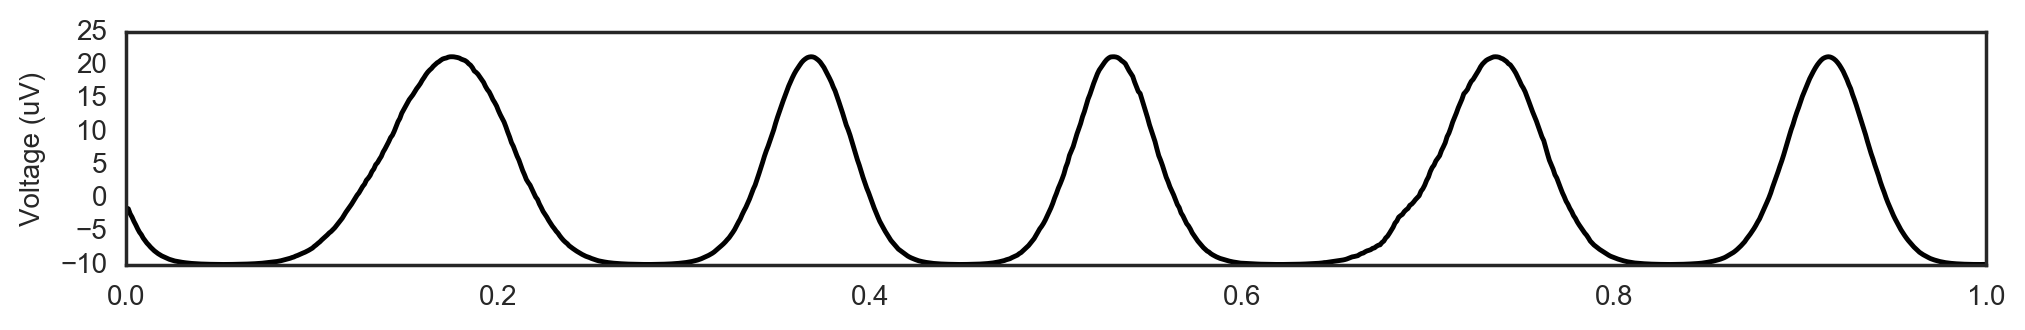

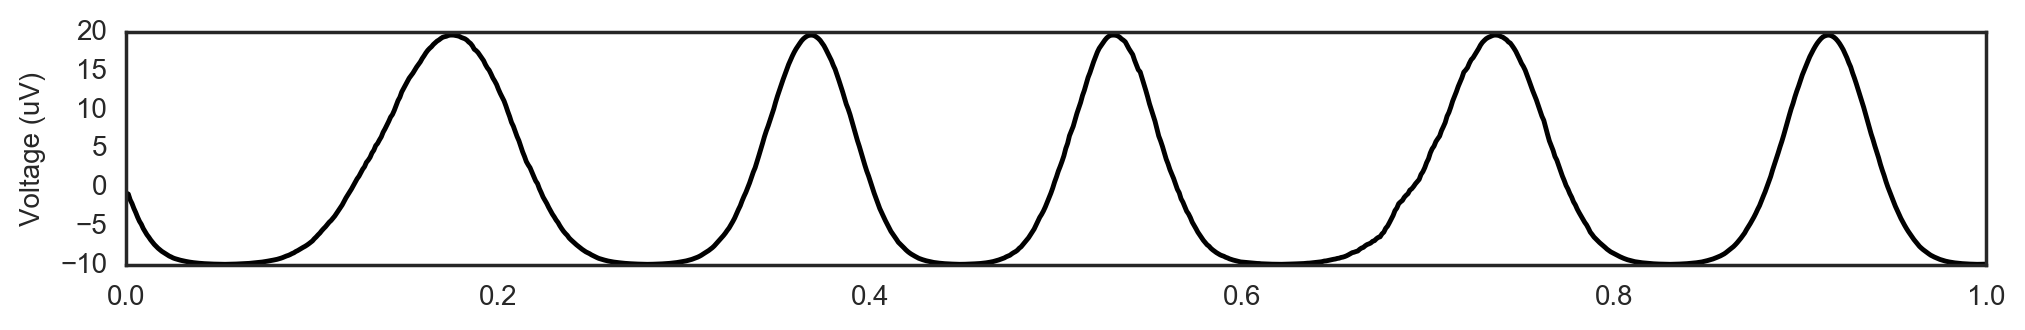

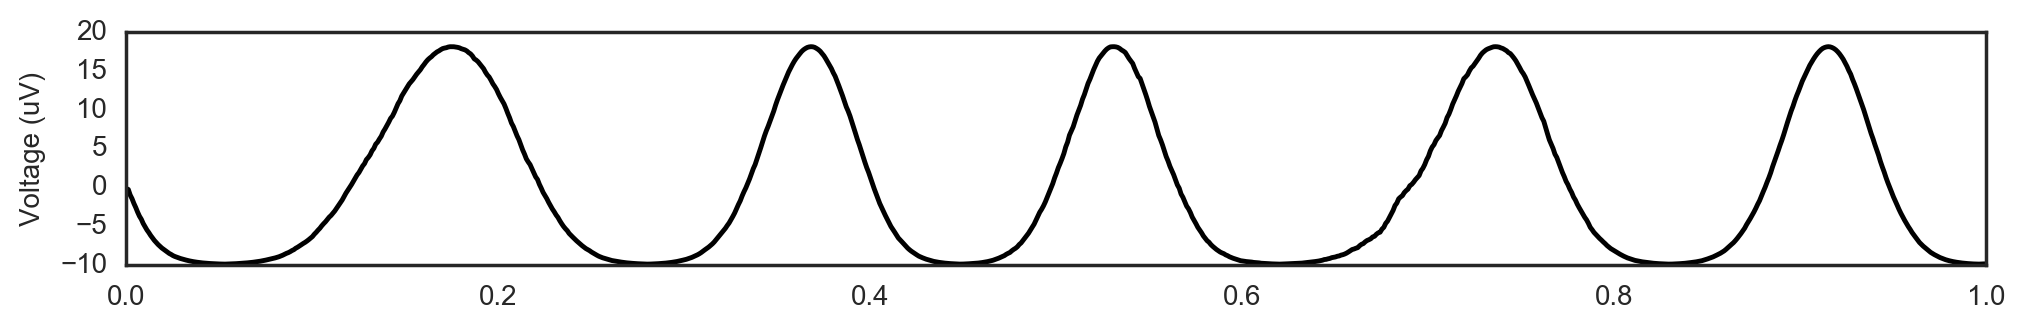

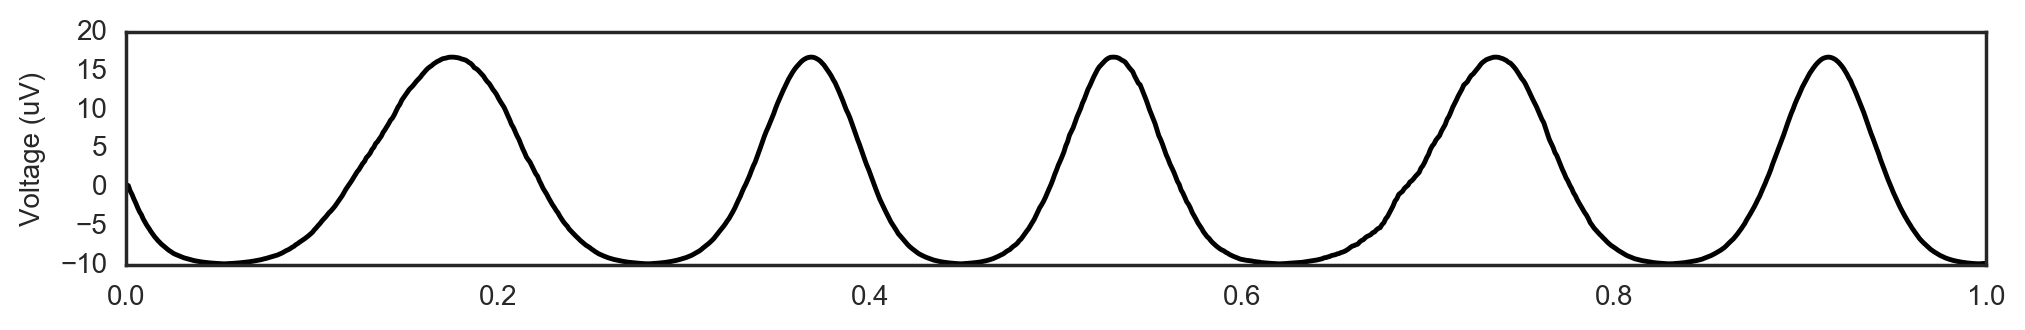

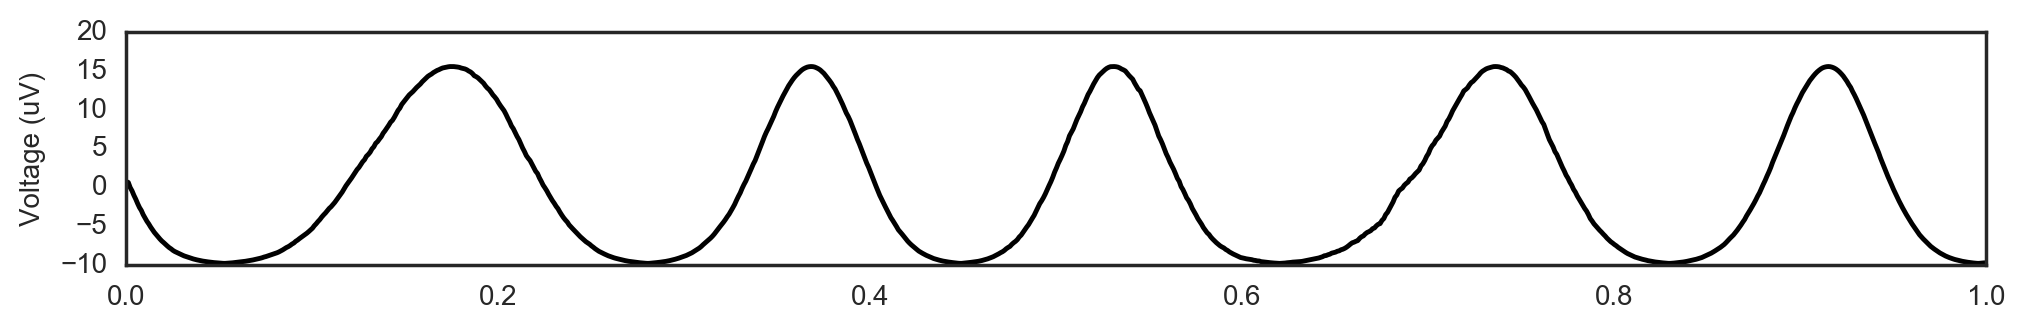

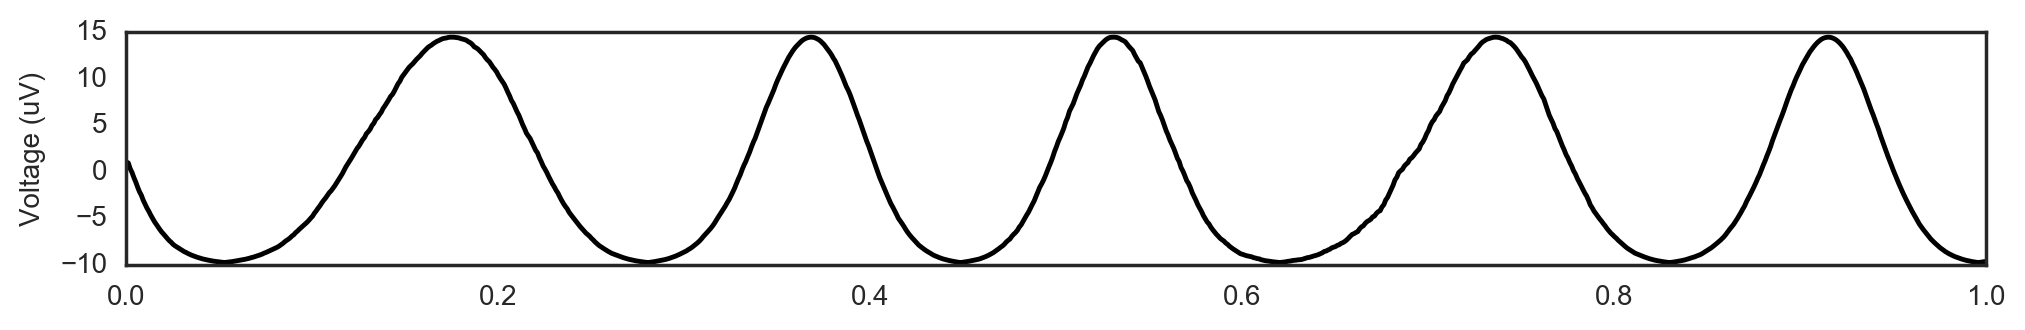

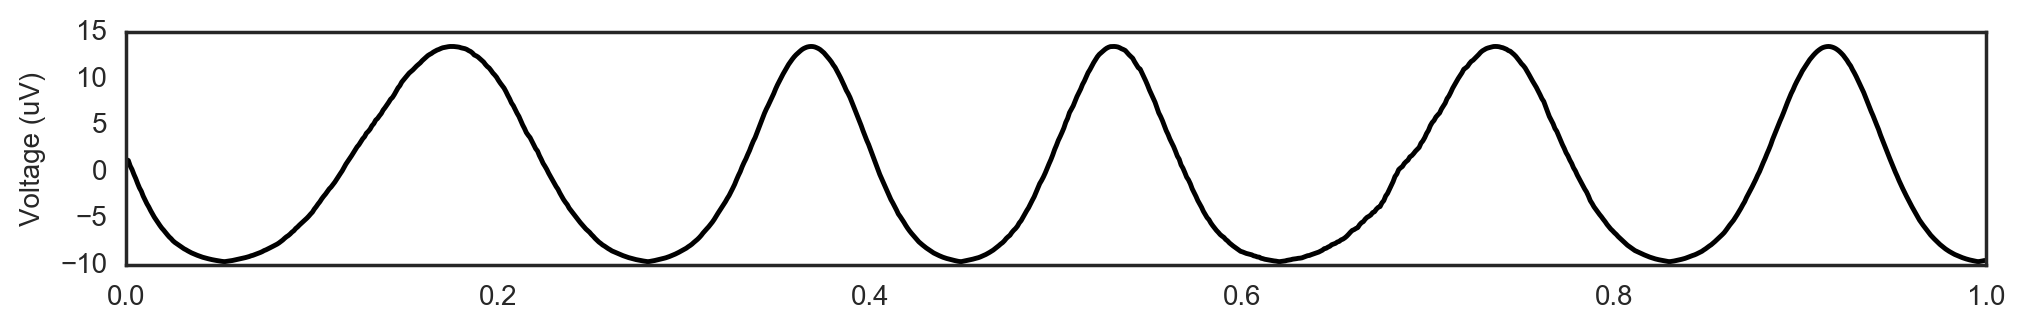

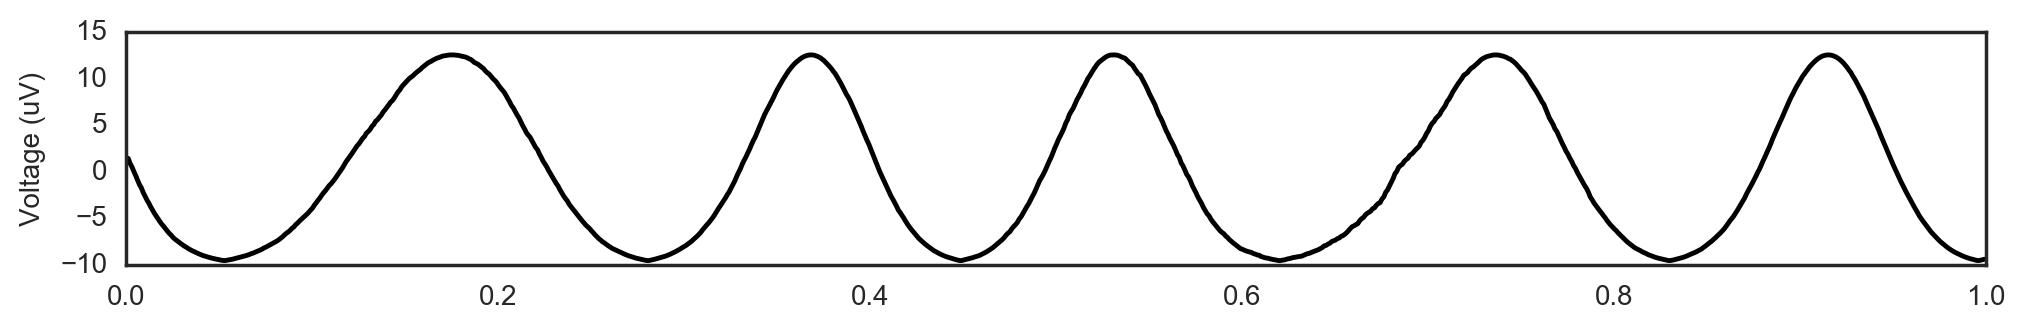

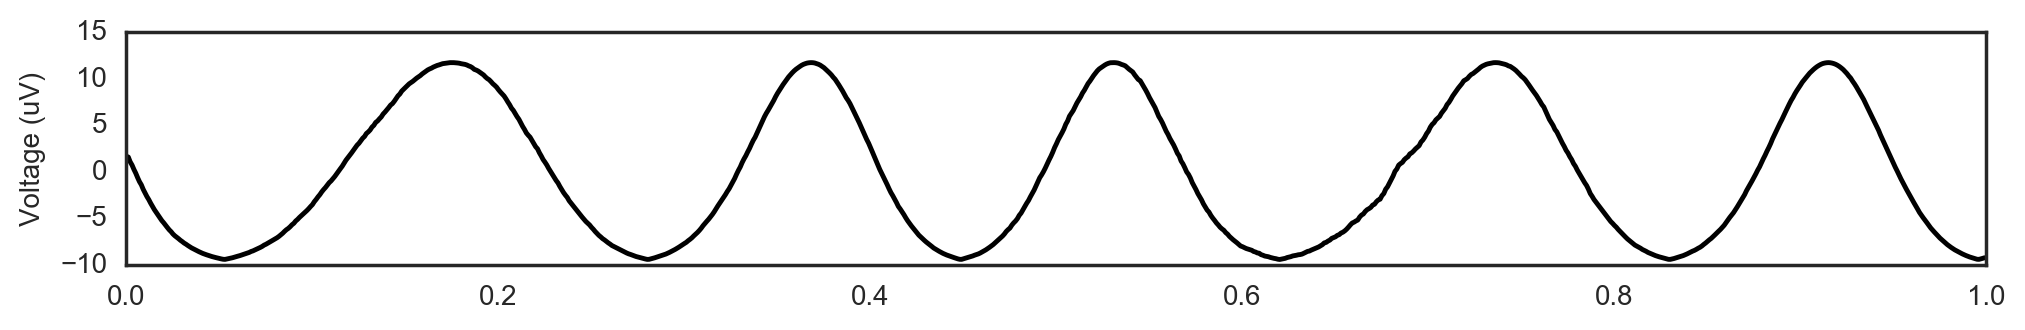

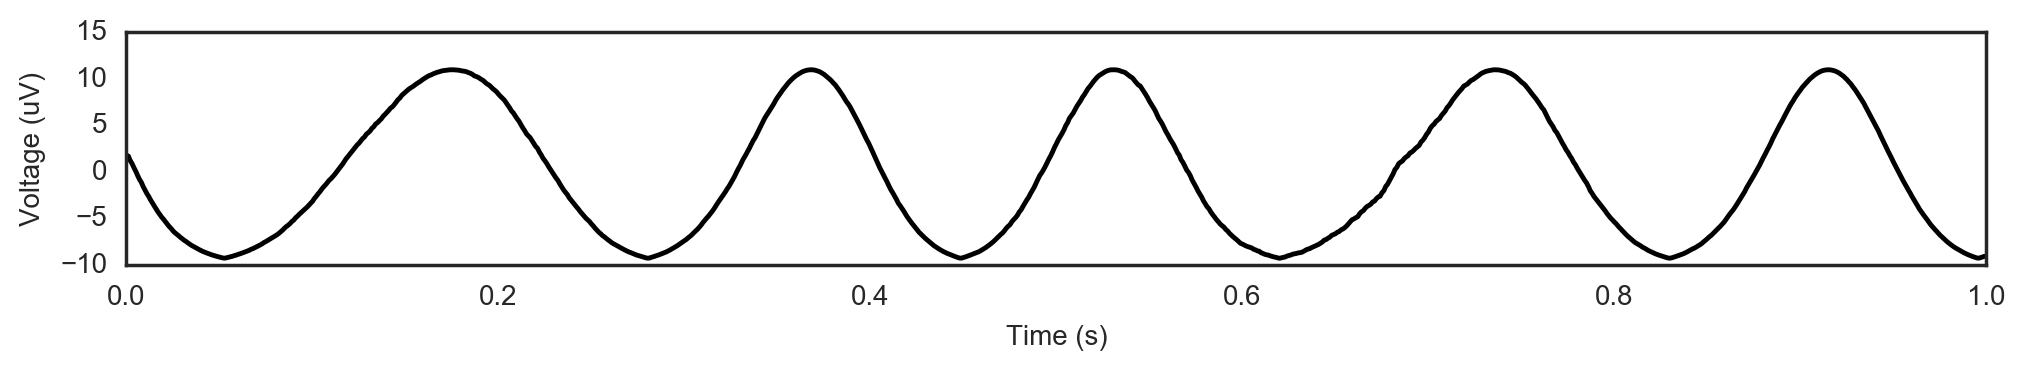

In [6]:
# Plot 2 second of each simulated oscillation
# Notice that the first signals are more asymmetric (sharper peaks), and the later signals are more sinusoidal
t_plot = [0,1]
t_plot_idx = np.where(np.logical_and(lfps_t>=t_plot[0],lfps_t<t_plot[1]))[0]

for n in range(N_shapes):
    plt.figure(figsize=(12,1.5))
    plt.plot(lfps_t[t_plot_idx], lfps[n][t_plot_idx],'k')
    plt.yticks(size=10)
    plt.ylabel('Voltage (uV)',size=10)
    if n == N_shapes - 1:
        plt.xticks(size=10)
        plt.xlabel('Time (s)',size=10)

# 1. Find peaks and troughs

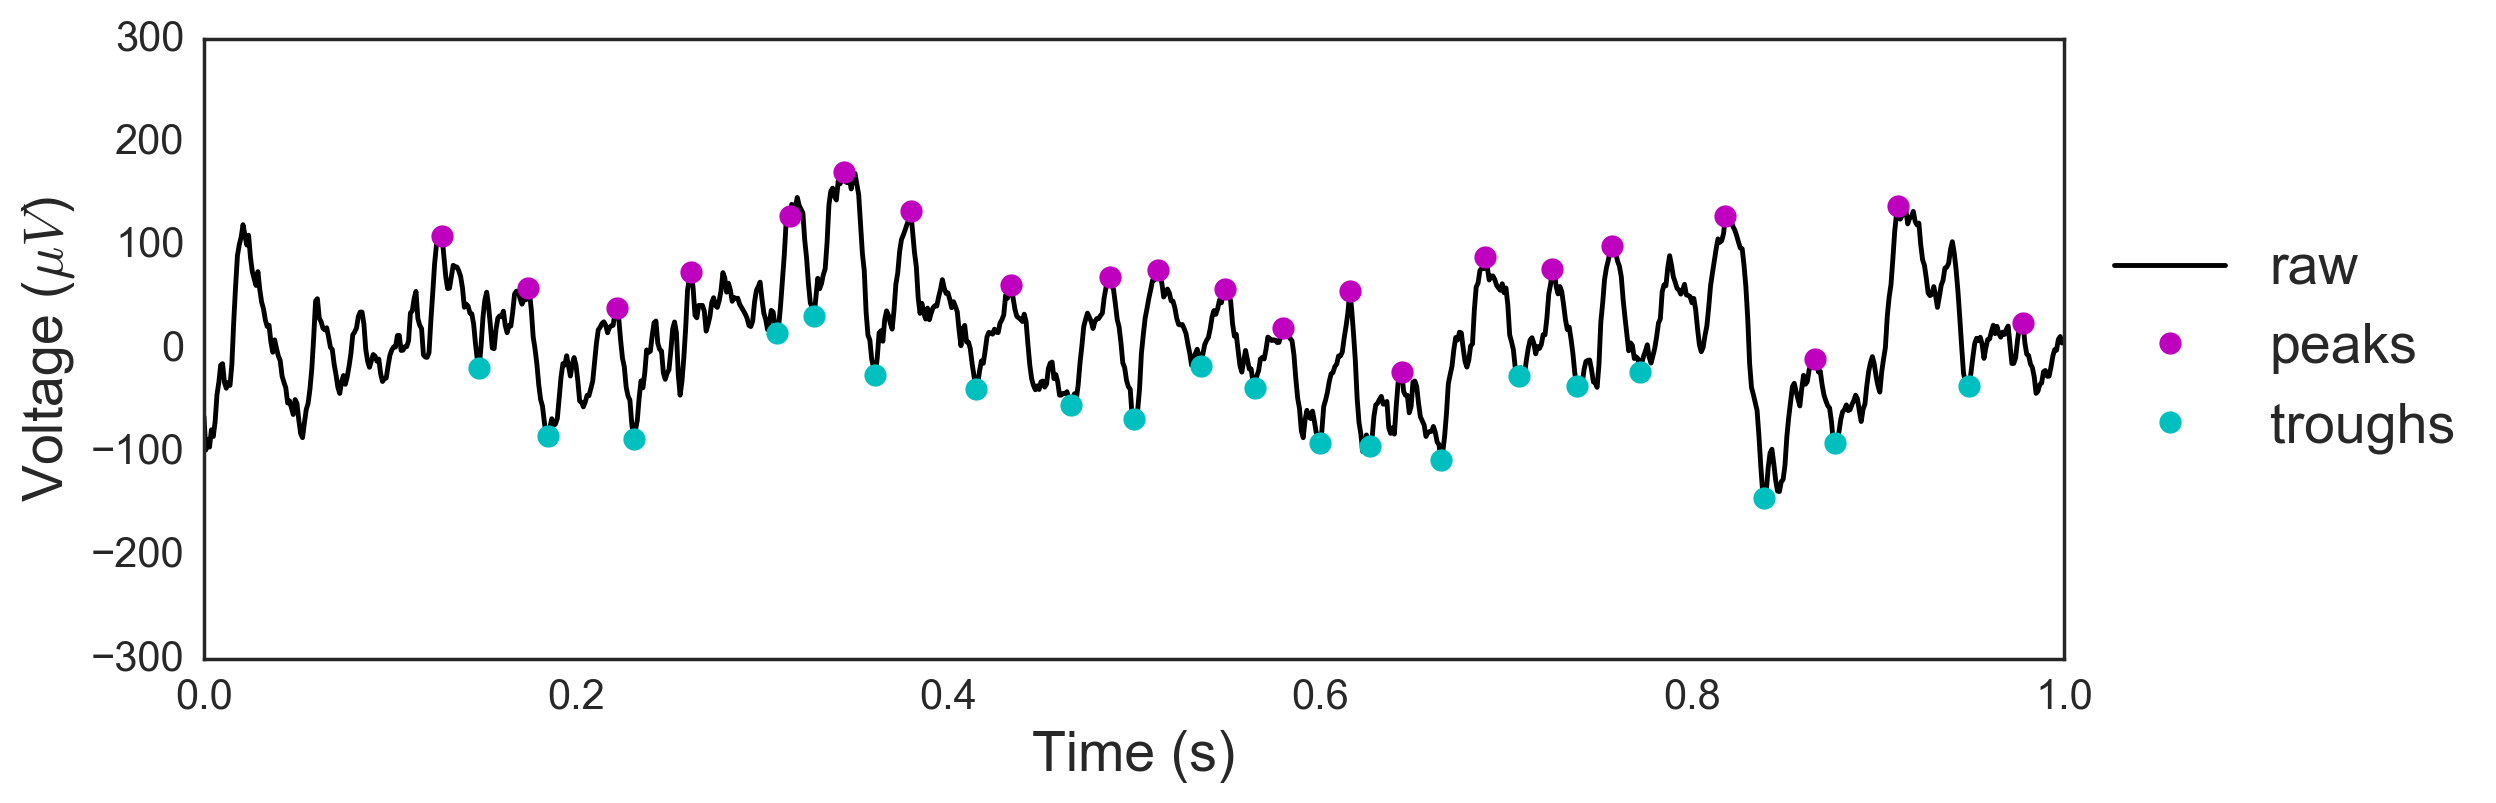

In [7]:
f_range = (13,30) # Define the frequency range of interest (Hz)
Ps, Ts = nonshape.findpt(x, f_range, Fs = Fs) # Find peaks and troughs

# Plot the raw signal with the identified peaks and troughs
t_plot = [0,1]
plt.figure(figsize=(12,4))
plt.plot(t, x, 'k-', label='raw')
plt.plot(t[Ps],x[Ps],'mo', ms=8, label='peaks')
plt.plot(t[Ts],x[Ts],'co', ms=8, label='troughs')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=20)
plt.xlim(t_plot)
plt.ylabel('Voltage ($\mu V$)',size=20)
plt.ylim((-300,300))
plt.yticks(size=15)
plt.xticks(size=15)
plt.xlabel('Time (s)',size=20)

# 2. Shape measures

In this section, we characterize the shape of the oscillations

## 2a. Rise-decay ratio

Oscillations can be sawtooth-shaped in that the rise time is faster than the decay time, or vice versa. In order to quantify this property, we measure the rise time and decay time in each cycle by taking the time difference between each peak and adjacent trough. We can then take the ratio of rise time and decay time to measure the degree of sawtooth-ness.

In [8]:
# Calculate rise times, decay times, and rise-decay ratios for each cycle
riset, decayt, rdr = shape.rdratio(Ps, Ts)

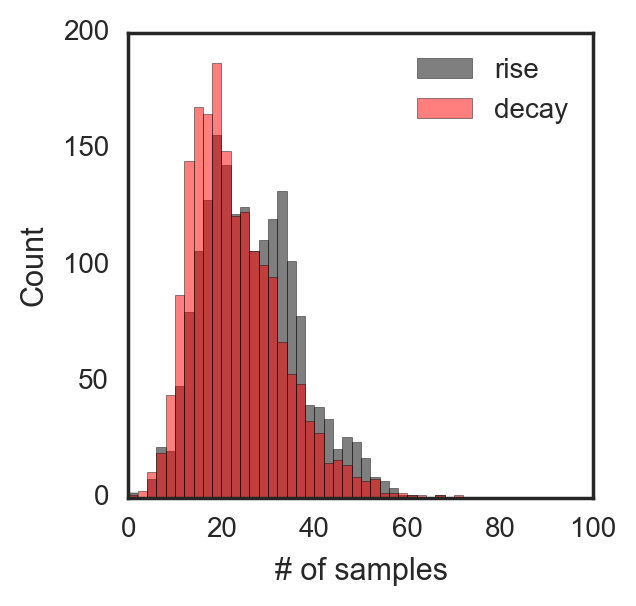

In [9]:
# Plot histograms of rise times, decay times
# We can see that these distibutions are nonoverlapping, showing that the decay is faster than the rise.
bins=np.arange(0,100,2)
plt.figure(figsize=(3,3))
plt.hist(riset,bins,color='k',label='rise',alpha=0.5)
plt.hist(decayt,bins,color='r',label='decay',alpha=0.5)
plt.ylabel('Count')
plt.legend(loc='best')
plt.xlabel('# of samples')

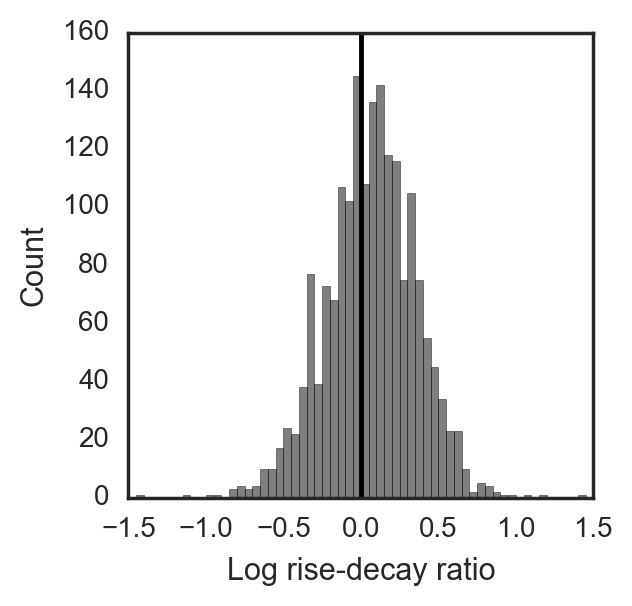

In [10]:
# Plot histogram of ratios
# We see that this distribution is skewed positive, indicating that the rise is longer than the decay
bins=np.arange(-1.5,1.5,.05)
plt.figure(figsize=(3,3))
plt.hist(np.log10(rdr),bins,color='k',alpha=0.5)
plt.axvline(x=0, color='k')
plt.ylabel('Count')
plt.xlabel('Log rise-decay ratio')

## 2b. Peak and trough duration

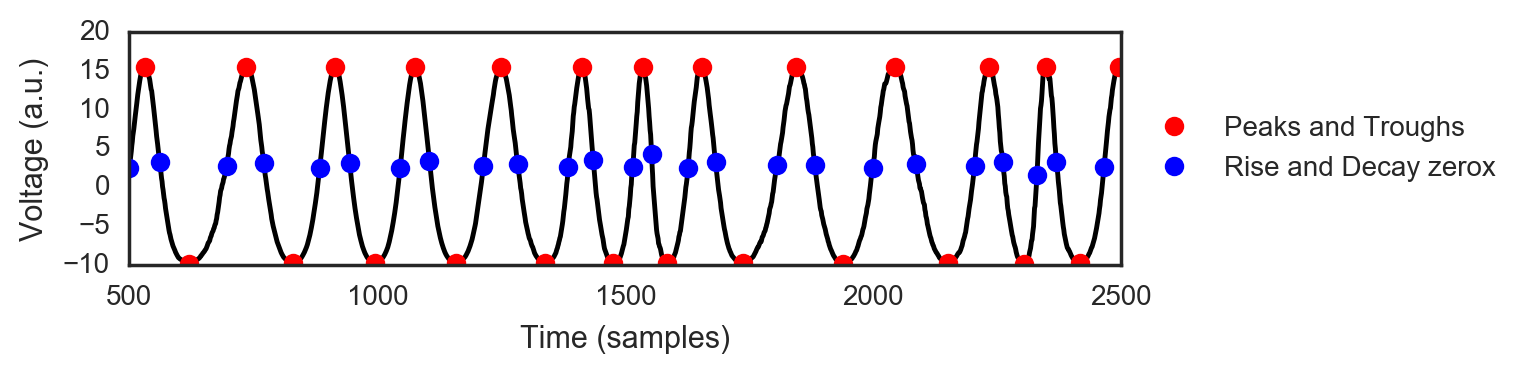

In [11]:
# Find zerocrossings halfway between Ps and Ts
x_temp = lfps[4]
Ps_temp, Ts_temp = nonshape.findpt(x_temp, (4,8), 1000)
zeroxR, zeroxD = nonshape.findzerox(x_temp, Ps_temp, Ts_temp)
plt.figure(figsize=(8,1.5))
plt.plot(x_temp,'k')
plt.plot(Ps_temp, x_temp[Ps_temp],'ro', label='Peaks and Troughs')
plt.plot(Ts_temp, x_temp[Ts_temp],'ro')
plt.plot(zeroxR, x_temp[zeroxR],'bo', label='Rise and Decay zerox')
plt.plot(zeroxD, x_temp[zeroxD],'bo')
plt.xlim((500,2500))
plt.xlabel('Time (samples)')
plt.ylabel('Voltage (a.u.)')

# Shrink current axis by 20%
ax = plt.gca()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

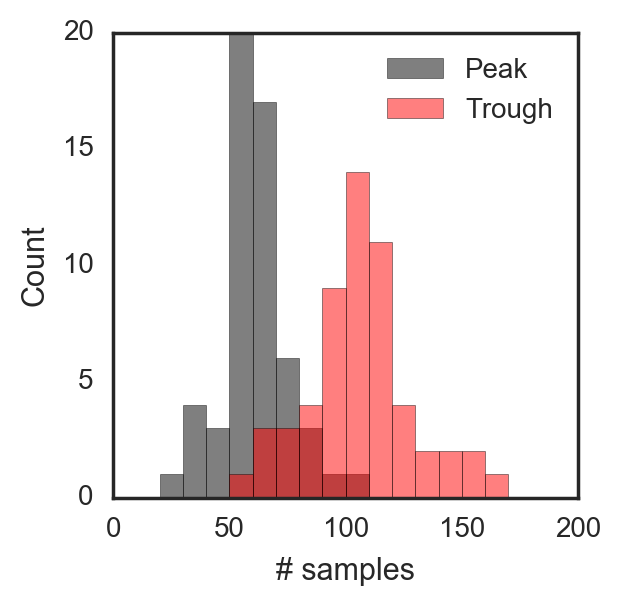

In [12]:
# Calculate peak and trough duration
Ps_dur, Ts_dur, ptr = shape.pt_duration(Ps_temp, Ts_temp, zeroxR, zeroxD)

# Plot histogram
bins=np.arange(0, 200, 10)
plt.figure(figsize=(3,3))
plt.hist(Ps_dur,bins,color='k',label='Peak',alpha=0.5)
plt.hist(Ts_dur,bins,color='r',label='Trough',alpha=0.5)
plt.ylabel('Count')
plt.xlabel('# samples')
plt.legend(loc='best')

## 2c. Symmetry: peak-trough and rise-decay

There are two functions that quantify the symmetry of the oscillation
* symPT - symmetry between peaks and troughs
* symRD - symmetry between rises and decays

These functions return a value of 0 if the oscillations are symmetric and a value closer to 1 if the oscillations are considerably asymmetric.

In [14]:
# Define constants used for calculating symmetry (see documentation of symPT and symRD)
window_half = 12
window_full = 25

# Measure symmetry values
symPT_vals = np.zeros(N_shapes,dtype=object)
symRD_vals = np.zeros(N_shapes,dtype=object)
for n in range(N_shapes):
    Ps, Ts = nonshape.findpt(lfps[n], flo, Fs = Fs)
    symPT_vals[n] = shape.symPT(lfps[n], Ps, Ts, window_half)
    symRD_vals[n] = shape.symRD(lfps[n], Ts, window_full)

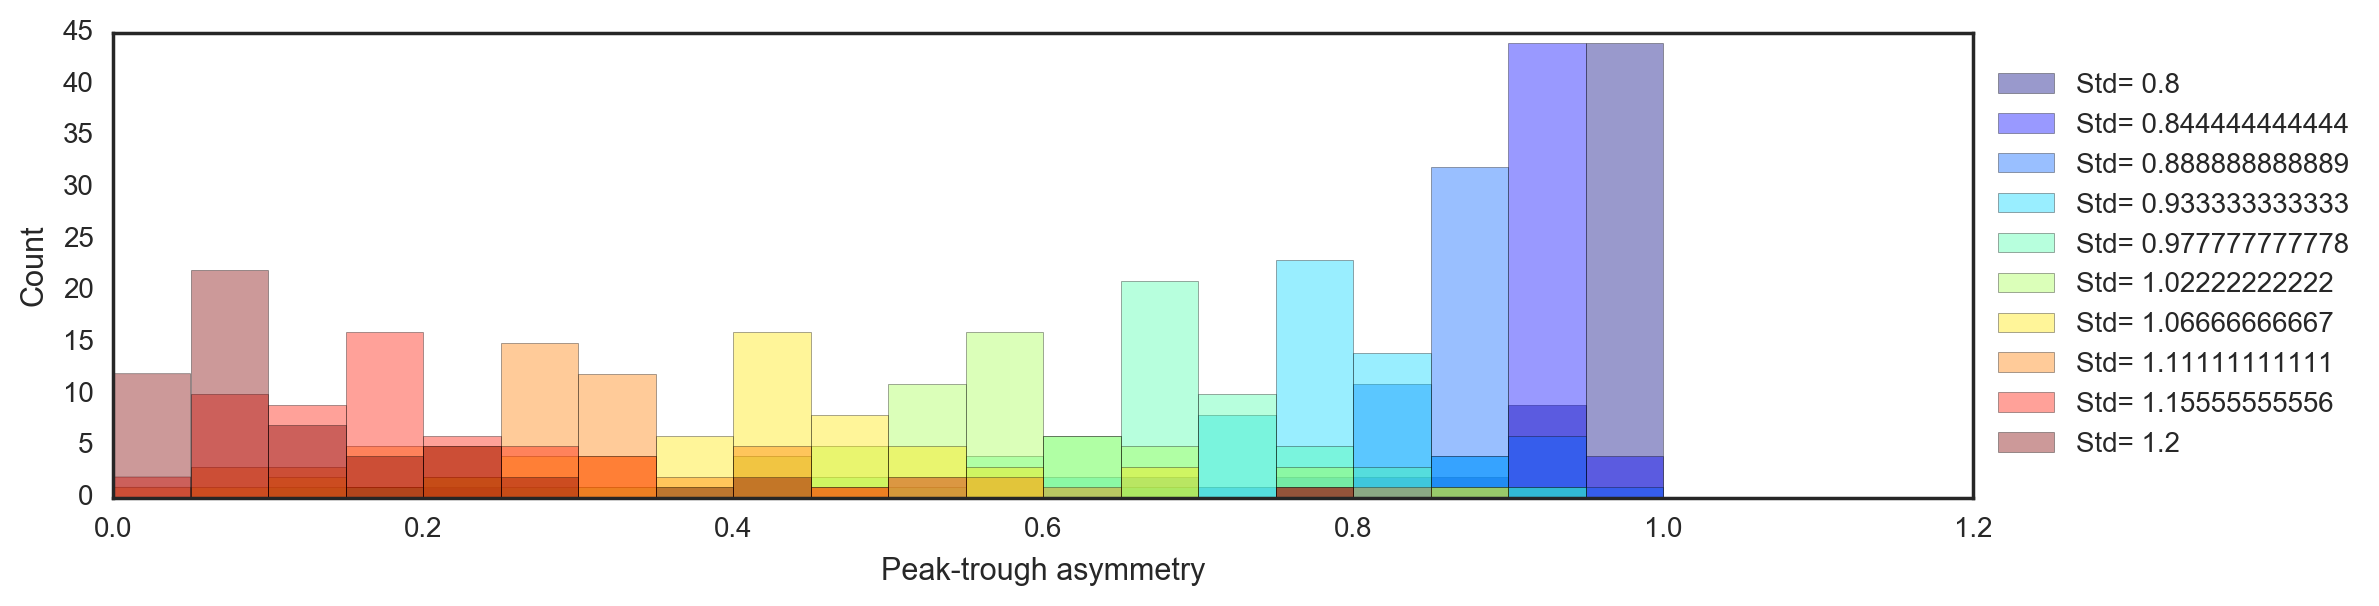

In [15]:
# Define a colormap for the plot
from tools.misc import getjetrgb
colors = getjetrgb(N_shapes)

# Plot histogram of peak-trough symmetries
# Notice that simulated signals using a high 'Std' value are more symmetric (closer to 0)
bins=np.arange(0, 1.1, .05)
plt.figure(figsize=(12,3))
for n in range(N_shapes):
    plt.hist(symPT_vals[n],bins,color=colors[n],alpha=0.4, label='Std= '+str(std_sharp[n]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)
plt.ylabel('Count')
plt.xlabel('Peak-trough asymmetry')

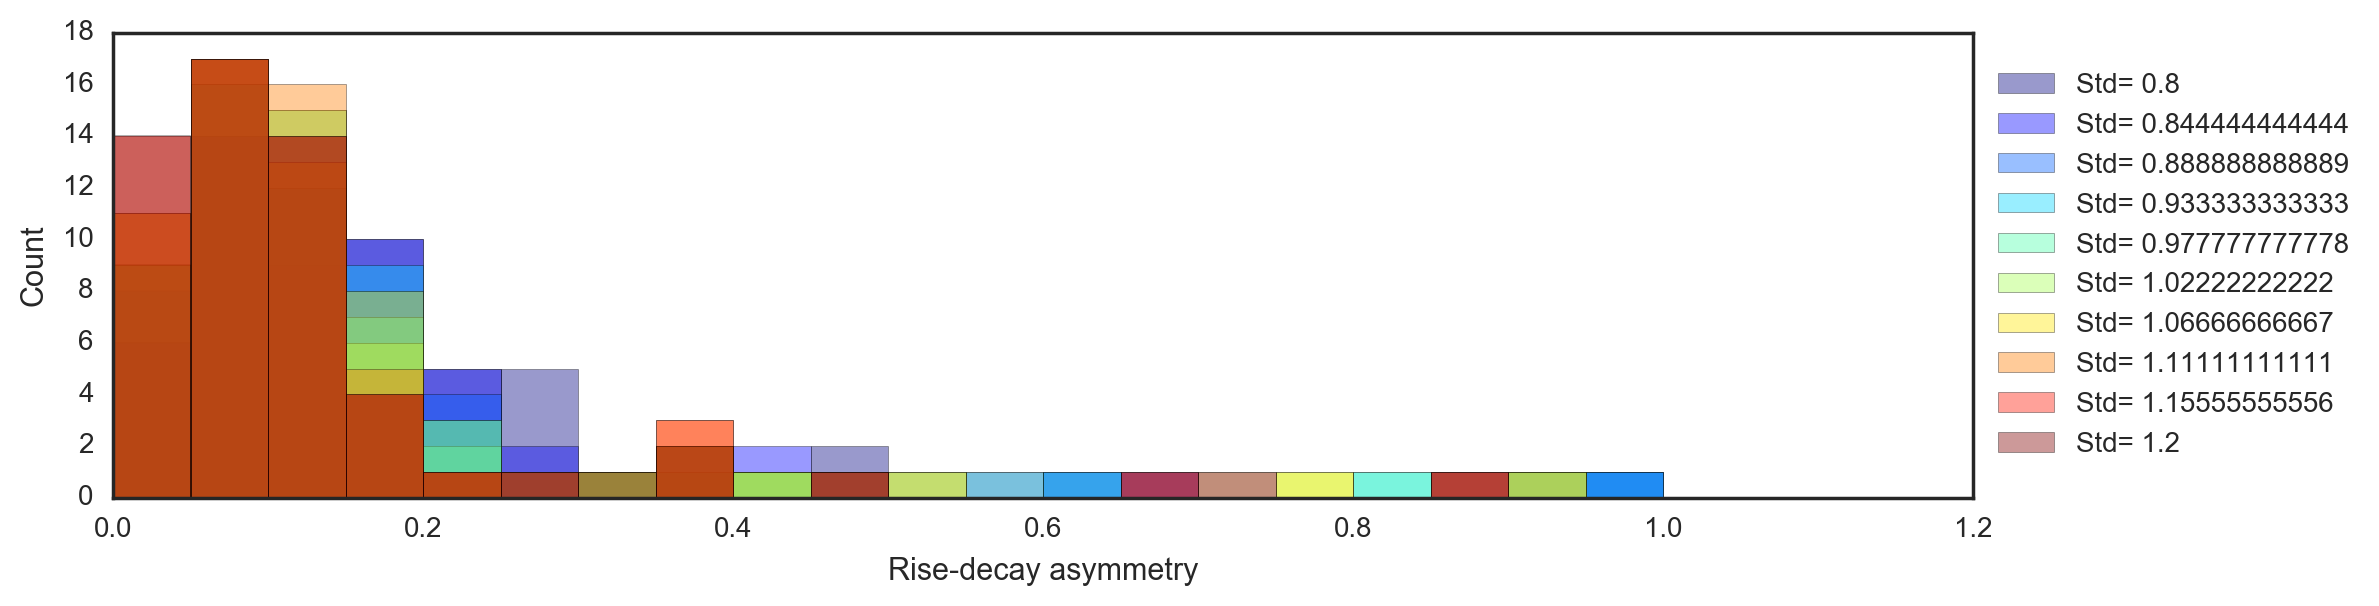

In [16]:
# Plot histograms  of rise-decay symmetries
# Notice that all simulates signals are fairly rise-decya symmetric (close to 0)
bins=np.arange(0, 1.1, .05)
plt.figure(figsize=(12,3))
colors = getjetrgb(N_shapes)
for n in range(N_shapes):
    plt.hist(symRD_vals[n],bins,color=colors[n],alpha=0.4, label='Std= '+str(std_sharp[n]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),fontsize=10)
plt.ylabel('Count')
plt.xlabel('Rise-decay asymmetry')

## 2d. Peak and trough sharpness

Calculate the sharpness of oscillations

In [17]:
# Calculate peak sharpness, trough sharpness, and sharpness ratio
Psharp = np.zeros(N_shapes,dtype=object)
Tsharp = np.zeros(N_shapes,dtype=object)
sharpratio = np.zeros(N_shapes,dtype=object)
for n in range(N_shapes):
    Ps, Ts = nonshape.findpt(lfps[n], flo, Fs = Fs)
    Psharp[n], Tsharp[n] = shape.pt_sharp(lfps[n], Ps, Ts, window_half)
    sharpratio[n] = shape.ptsr(Psharp[n],Tsharp[n])

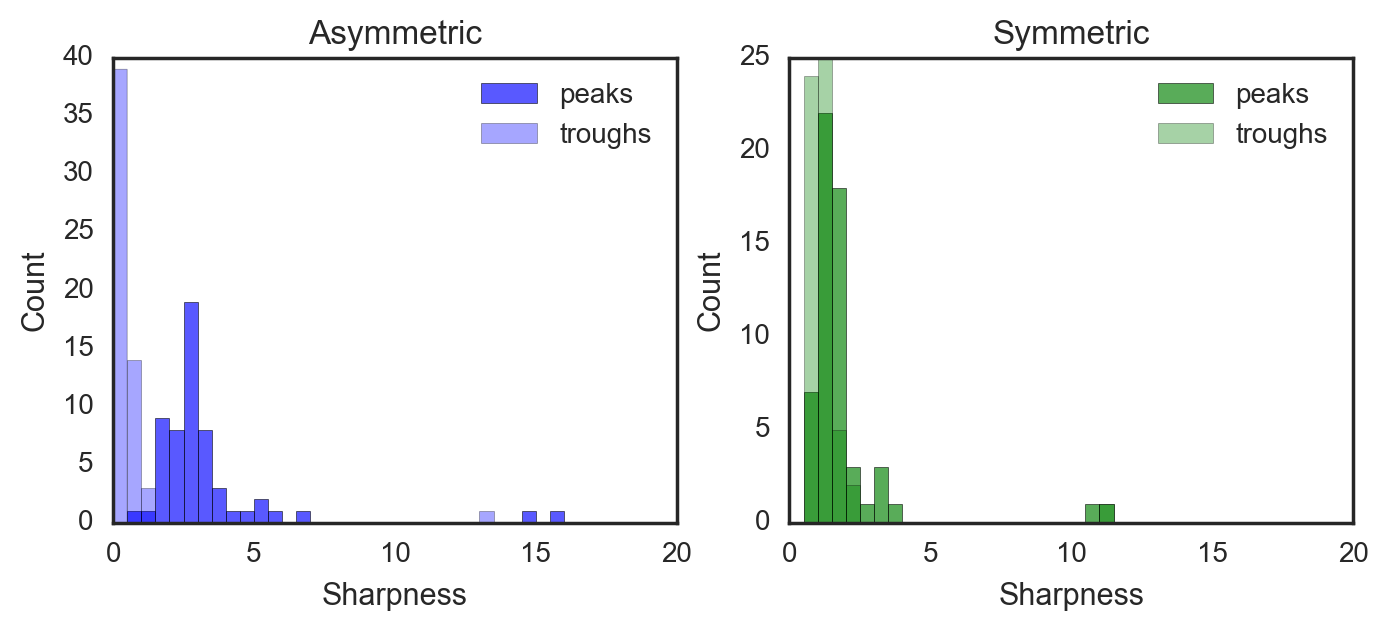

In [18]:
# Plot histograms of rise times, decay times
# Notice that the histograms are less overlapping when the simulated oscillation is asymmetric
# Notice that the histograms are roughly overlapping when the oscillations are symmetric
plt.figure(figsize=(8,3))

plt.subplot(1,2,1)
bins=np.arange(0,20,.5)
plt.hist(Psharp[4],bins,color='b',label='peaks',alpha=0.65)
plt.hist(Tsharp[4],bins,color='b',label='troughs',alpha=0.35)
plt.title('Asymmetric')
plt.ylabel('Count')
plt.legend(loc='best')
plt.xlabel('Sharpness')
plt.subplot(1,2,2)
plt.hist(Psharp[-1],bins,color='g',label='peaks',alpha=0.65)
plt.hist(Tsharp[-1],bins,color='g',label='troughs',alpha=0.35)
plt.title('Symmetric')
plt.ylabel('Count')
plt.legend(loc='best')
plt.xlabel('Sharpness')

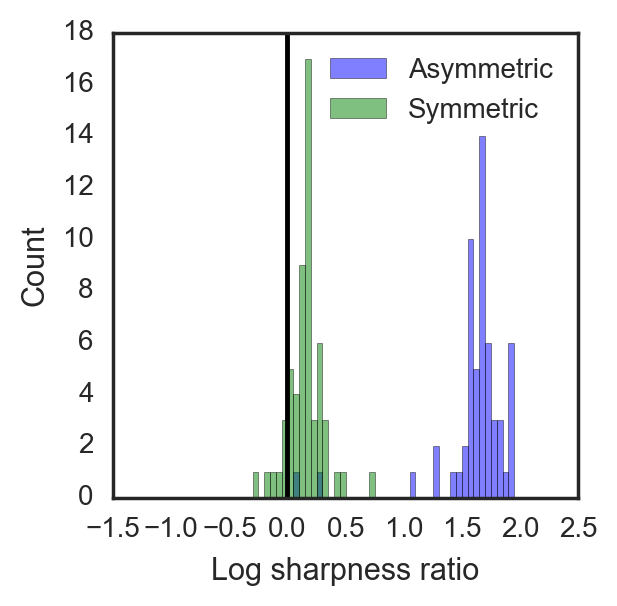

In [19]:
# Plot histogram of ratios
# Notice that the sharpness ratio (peak sharper than trough) is more positive for the asymmetric oscillation
bins=np.arange(-1.5,2.5,.05)
plt.figure(figsize=(3,3))
plt.hist(sharpratio[0],bins,color='b',alpha=0.5,label='Asymmetric')
plt.hist(sharpratio[-1],bins,color='g',alpha=0.5,label='Symmetric')
plt.legend(loc='best')
plt.axvline(x=0, color='k')
plt.ylabel('Count')
plt.xlabel('Log sharpness ratio')

## 2e. Rise and decay steepness

Quantify the steepness of rises and decays

In [20]:
# Calculate steepness and steepness ratio betwen rise and decay
Ps, Ts = nonshape.findpt(x, flo, Fs = Fs)
Rsteep, Dsteep = shape.rd_steep(x, Ps, Ts)
steepratio = shape.rdsr(Rsteep,Dsteep)

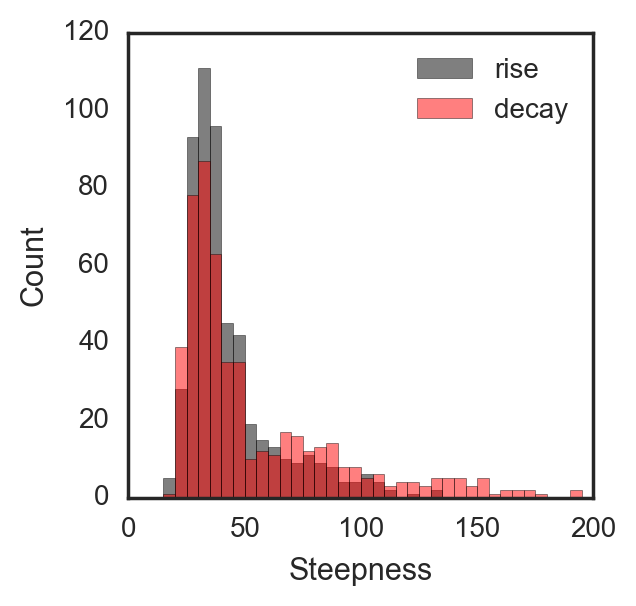

In [21]:
# Plot histograms of rise times, decay times
# Notice that the distributions are nonoverlapping: decays are steeper than rises
plt.figure(figsize=(3,3))
bins=np.arange(0,200,5)
plt.hist(Rsteep,bins,color='k',label='rise',alpha=0.5)
plt.hist(Dsteep,bins,color='r',label='decay',alpha=0.5)
plt.ylabel('Count')
plt.legend(loc='best')
plt.xlabel('Steepness')

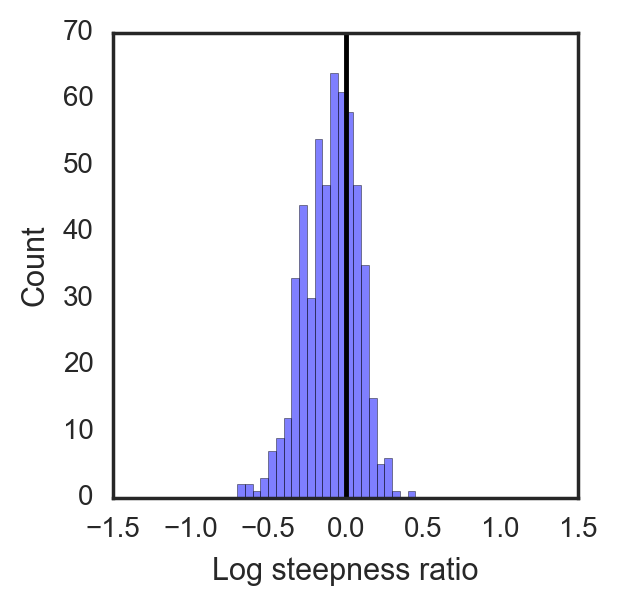

In [22]:
# Plot histogram of ratios
# Notice that distribution is shifted to the left because decays are steeper than rises (right-shifted would reflect the opposite)
bins=np.arange(-1.5,1.5,.05)
plt.figure(figsize=(3,3))
plt.hist(steepratio,bins,color='b',alpha=0.5)
plt.axvline(x=0, color='k')
plt.ylabel('Count')
plt.xlabel('Log steepness ratio')

## 2e. Amplitude threshold for shape analysis

Here, we restrict our analysis to the oscillations in the top 10% in amplitude.

We can see that the peak-trough sharpness is especially asymmetric for these high-amplitude oscillations

In [23]:
# Calculate sharpness and sharpness ratio for all cycles (no oscillation threshold)
fosc = (13,30)
Ps, Ts = nonshape.findpt(x, fosc, Fs = Fs)
Psharp0, Tsharp0 = shape.pt_sharp(x, Ps, Ts, window_half)
sharpratio0 = shape.ptsr(Psharp0,Tsharp0)

# Calculate sharpness ratio using amplitude threshold
ampPC = 90 # Restrict oscillations to be greater than the 90th percentile in amplitude to be analyzed
fosc = (13,30)

# Restrict sharpness analysis for only oscillations above 90th percentile
Psharp90, _ = shape.threshold_amplitude(x, Psharp0, Ps, ampPC, fosc, Fs)
Tsharp90, _ = shape.threshold_amplitude(x, Tsharp0, Ts, ampPC, fosc, Fs)
sharpratio90, _ = shape.threshold_amplitude(x, sharpratio0, Ps, ampPC, fosc, Fs)

# Delete nans from sharpness ratio
sharpratio0 = sharpratio0[~np.isnan(sharpratio0)]
sharpratio90 = sharpratio90[~np.isnan(sharpratio90)]
sharpratio0 = sharpratio0[~np.isinf(sharpratio0)]
sharpratio90 = sharpratio90[~np.isinf(sharpratio90)]

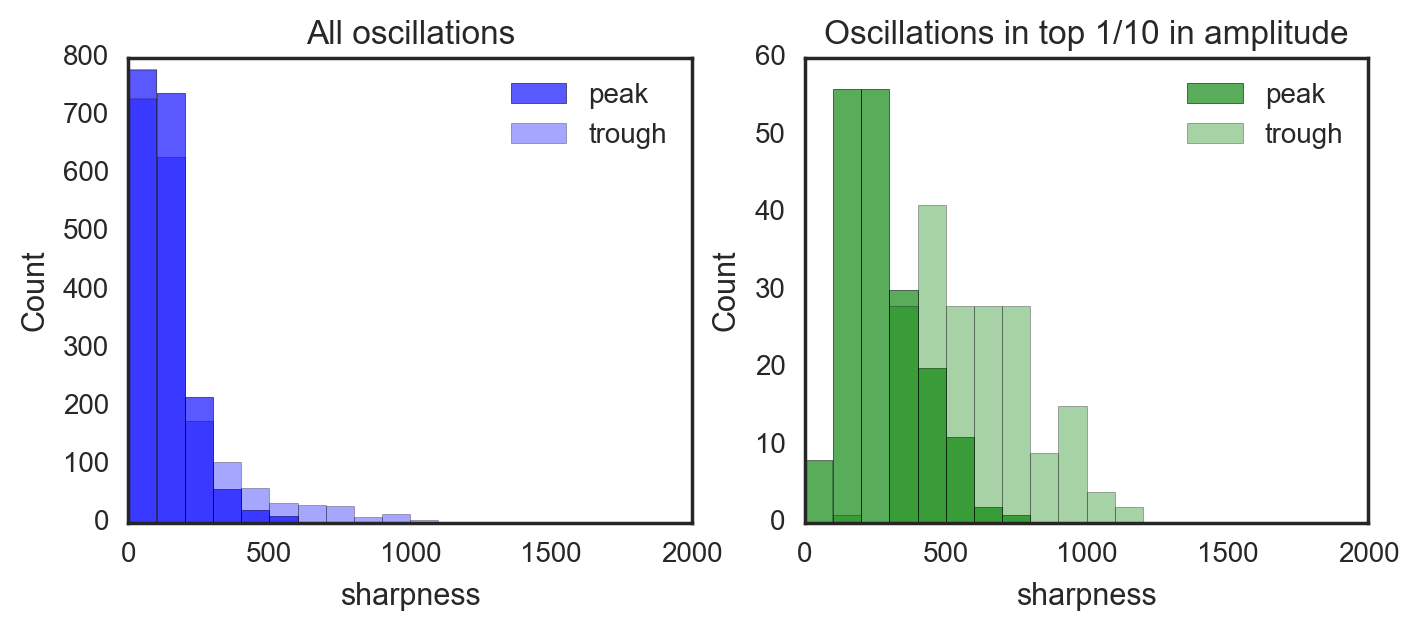

In [24]:
# Plot histograms of rise times, decay times
# Notice that the peak and trough sharpness distributions were more separated when only analyzing  top 10%
bins=np.arange(0,2000,100)
plt.figure(figsize=(8,3))
plt.subplot(1,2,1)
plt.hist(Psharp0,bins,color='b',label='peak',alpha=0.65)
plt.hist(Tsharp0,bins,color='b',label='trough',alpha=0.35)
plt.ylabel('Count')
plt.legend(loc='best')
plt.xlabel('sharpness')
plt.title('All oscillations')
plt.subplot(1,2,2)
plt.hist(Psharp90,bins,color='g',label='peak',alpha=0.65)
plt.hist(Tsharp90,bins,color='g',label='trough',alpha=0.35)
plt.ylabel('Count')
plt.legend(loc='best')
plt.xlabel('sharpness')
plt.title('Oscillations in top 1/10 in amplitude')

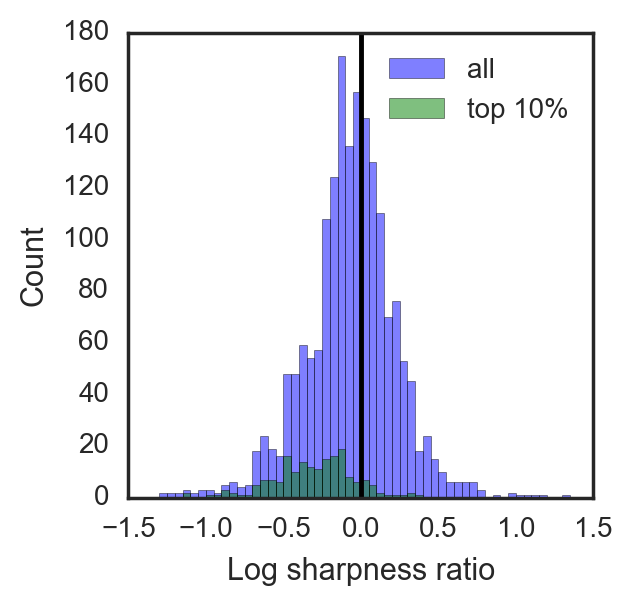

In [25]:
# Plot histogram of ratios
# Notice that the sharpness ratio distribution is more skewed to the left when focusing on high-amplitude oscillations because they are more consistently sharpness-asymmetric (troughs sharper than peaks)
bins=np.arange(-1.5,1.5,.05)
plt.figure(figsize=(3,3))
plt.hist(sharpratio0,bins,color='b',alpha=0.5,label='all')
plt.hist(sharpratio90,bins,color='g',alpha=0.5,label='top 10%')
plt.axvline(x=0, color='k')
plt.ylabel('Count')
plt.xlabel('Log sharpness ratio')
plt.legend(loc='best')